In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#df1 is always the entire dataset and df2 is always the indices of the subsequences
def prepare_datsets(df1,df2):
  #change data from dataframe to np array
  df1 = df1[df1.keys()[1]].values
  #change to np array and change the shape from column vector to row vector
  df2 = df2.values.reshape(df2.values.shape[0],)
  #change the index to python friendly (matlab starts at 1 while python starts at 0)
  df2 = df2 - 1
  #return the datasets
  return df1, df2

In [ ]:
import numpy as np
import pandas as pd

#def time_series_chain(chain,length):
def chain_to_train(dataset,chain_idx,subsequence_length):

#given the csv file
  #that csv will have the indexes of the subsequences of the chains
#  chain_idx = bees all time indeces start
  ##read in two csv files, whole dataset and what frida gives us
#take the indexes, find the corresponding value from our dataset
  longest_chain_values = [dataset[i:i+subsequence_length] for i in chain_idx]

 #//change that into np array
  chain_values = np.array(longest_chain_values)
  sub = chain_values.shape[0]
 # array.shape

#do the correct split
  train = chain_values[0:(sub-1),:]
  target = chain_values[1:sub,:]
#return train and target
  return train, target



#train_data, target_data = chain_to_train(data, chain, desired_chain_length)

#print(train_data)
#print("\n")
#print(target_data)


The variable and function names are not readable.
Please change dataset1 and dataset2 to data, chain_starts


In [ ]:

data = pd.read_csv('/content/drive/MyDrive/Datasets/Datasets-Frida/bees_alltime.csv', skiprows=1)
chain_starts = pd.read_csv('/content/drive/MyDrive/TSC csv/tscs/beesalltime_chainStarts.csv',header=None)
data, chain_starts = prepare_datsets(data, chain_starts)

train_data, target_data = chain_to_train(data, chain_starts, 10)

np.save("/content/drive/MyDrive/train and target/train_data.npy", train_data)
np.save("/content/drive/MyDrive/train and target/target_data.npy", target_data)

# train_df = pd.DataFrame(train_data)
# target_df = pd.DataFrame(target_data)

# train_df.to_csv("/content/drive/MyDrive/train and target/train_vector.csv")
# target_df.to_csv("/content/drive/MyDrive/train and target/target_vector.csv")

In [ ]:
train_data.shape

(4, 10)

In [ ]:
np.save("/content/drive/MyDrive/train and target/train_data.npy", train_data)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

#plotChainWithData
#input: data, chain_start_index, subseq_len
#Step1: plot data
#Step 2: plot each chain subsequence with a different color
#output: a plot similar with the top plot
def plotChainWithData(data, chain_starts, subseq_len):
  colors = ['red', 'green', 'purple', 'orange', 'pink']
  ax = data.plot(color='purple')
  longest_chain_values = [data[i:i+subseq_len] for i in chain_starts]
  longest_chain_values_df = pd.DataFrame(np.array(longest_chain_values))
  longest_chain_values_df.plot

# Show the plot
plt.show()
#print(data)


<class 'numpy.ndarray'>
[  7  78  90 138 174]
[[36 29 25 22 19 20 21 21 32 35]
 [32 31 26 24 20 19 24 23 31 36]
 [35 36 32 28 25 23 26 26 35 43]
 [44 44 38 33 28 26 29 32 40 56]
 [53 53 46 40 34 33 35 40 45 68]]
[36 29 25 22 19 20 21 21 32 35]


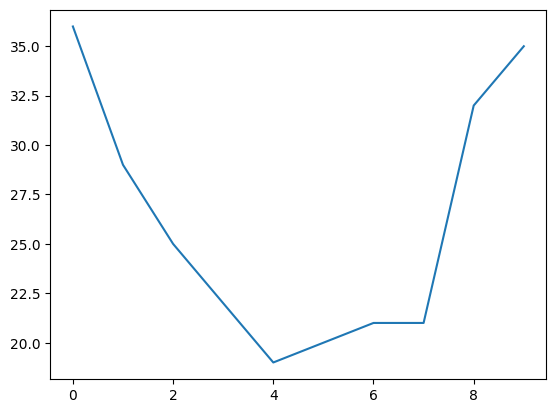

In [ ]:
# Example usage:
data_2 = pd.read_csv('/content/drive/MyDrive/Datasets/Datasets-Frida/bees_alltime.csv', skiprows=1)
#chain_starts = pd.read_csv('/content/drive/MyDrive/TSC csv/tscs/beesalltime_chainStarts.csv',header=None)
subseq_len = 10  # Adjust the subsequence length as needed
print(type(chain_starts))
#plotChainWithData(data, chain_starts, subseq_len)
print(chain_starts)
longest_chain_values = [data[i:i+10] for i in chain_starts]
longest_chain_values = np.array(longest_chain_values)
print(longest_chain_values)
print(longest_chain_values[0,:])

plt.plot(longest_chain_values[0,:])

[[  7   8   9  10  11  12  13  14  15  16]
 [ 78  79  80  81  82  83  84  85  86  87]
 [ 90  91  92  93  94  95  96  97  98  99]
 [138 139 140 141 142 143 144 145 146 147]
 [174 175 176 177 178 179 180 181 182 183]]


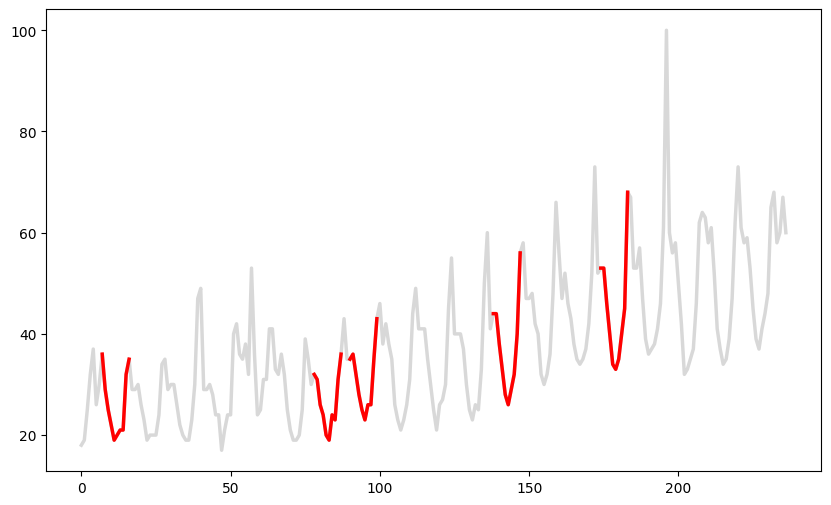

In [ ]:
array = []
for i in chain_starts:
  new_array = np.arange(i, i+10)
  array.append(new_array)
big_array = np.vstack(array)
print(big_array)
np.save("/content/drive/MyDrive/train and target/sub_idx.npy", big_array)
#plt.plot(longest_chain_values[0,:],big_array[0,:])
plt.figure(figsize=(10, 6))
plt.plot(data, color="gray",alpha = 0.3,lw=2.5)
for i in range(big_array.shape[0]):
  plt.plot(big_array[i,:],longest_chain_values[i,:],lw=2.5,color="red")


[[-0.52522573 -1.08255378 -1.07165176 -1.13859629 -1.12895341 -0.83401654
  -1.25656172 -1.07438362 -0.87814408 -0.99537121]
 [-1.05045146 -0.85702174 -0.94407417 -0.83086756 -0.94686415 -1.03259191
  -0.62828086 -0.78400967 -1.06904497 -0.9163735 ]
 [-0.65653216 -0.29319165 -0.17860863 -0.21541011 -0.03641785 -0.23829044
  -0.20942695 -0.34844874 -0.30544142 -0.36338949]
 [ 0.52522573  0.6089365   0.58685692  0.55391171  0.50984993  0.35743566
   0.41885391  0.52267311  0.64906302  0.66358081]
 [ 1.70698363  1.62383067  1.60747764  1.63096226  1.60238549  1.74746324
   1.67541563  1.68416892  1.60356745  1.61155339]]
68
[[ 0.28631674 -0.39078366 -0.77769817 -1.06788405 -1.35806994 -1.26134131
  -1.16461268 -1.16461268 -0.10059777  0.18958811]
 [-0.10059777 -0.1973264  -0.68096954 -0.8744268  -1.26134131 -1.35806994
  -0.8744268  -0.97115543 -0.1973264   0.28631674]
 [ 0.18958811  0.28631674 -0.10059777 -0.48751229 -0.77769817 -0.97115543
  -0.68096954 -0.68096954  0.18958811  0.963417

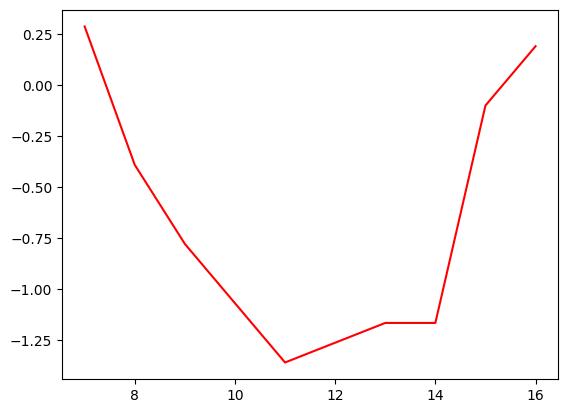

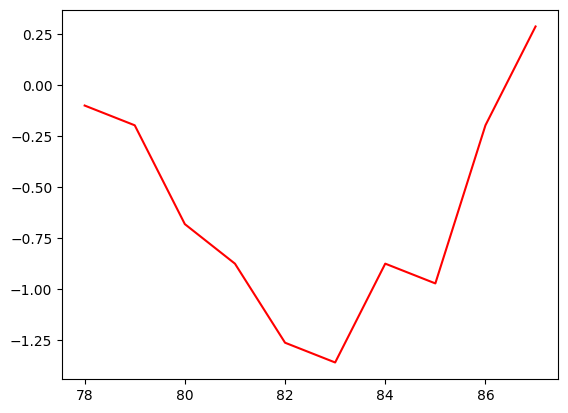

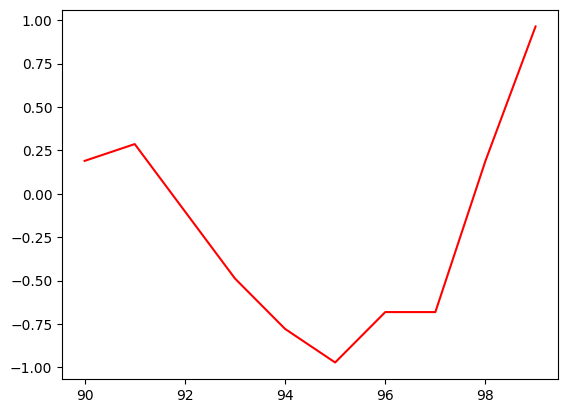

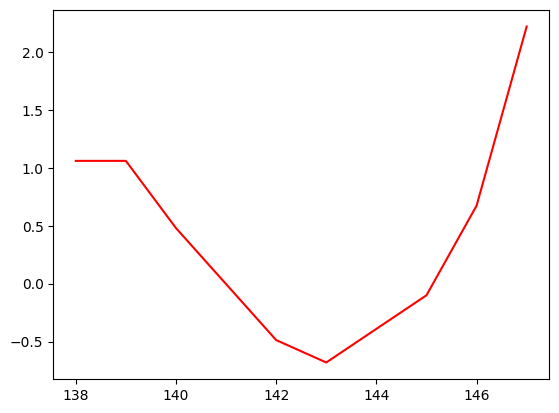

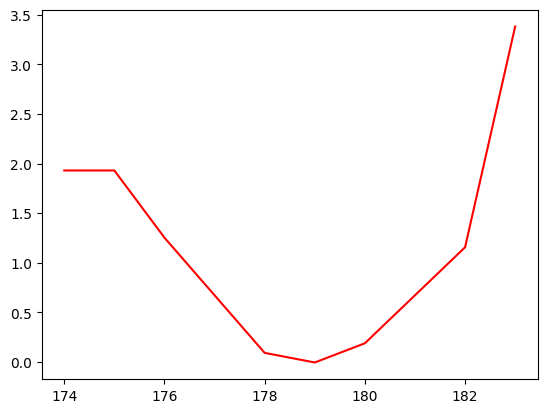

<Figure size 640x480 with 0 Axes>

In [ ]:
import scipy as sc
#z_score = ((longest_chain_values - np.mean(longest_chain_values)) / (np.std(longest_chain_values)))
z_score = ((longest_chain_values - np.mean(longest_chain_values)) / (np.std(longest_chain_values)))

# print(z_score)
z = sc.stats.zscore(longest_chain_values)
print(z)
print(longest_chain_values[4,9])
print(z_score)
for i in range(z_score.shape[0]):
  plt.plot(big_array[i,:],z_score[i,:],color="red")
  plt.figure()

In [ ]:
import math
print(np.mean(data))
print(np.std(data))
print((68-np.mean(longest_chain_values))/(np.std(longest_chain_values)))

37.565400843881854
13.437499686887614
3.3816328378919462


In [ ]:
big_array.shape[0]

5

In [ ]:
#plotChain
#Input: data, chain_start_index, subseq_len
#Construct a subplot
#Step1: normalize each chain
#Step2: plot normalized chain on each subplot.
#Output: plot similar with the bottom plot


def plotChain(data, chain_start_index, subseq_len):

  # input: data, chain_starts
  # output: plot of normalized chain